# Data Aquisition From Yahoo Finance

In [100]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

# Define the stock symbol and the date range
stock_symbol = 'AAPL'
start_date = '2014-01-01'
end_date = '2023-12-31'

# Download the stock data
df_aapl = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print("Apple stock data from 2014 to 2023:")
print(df_aapl.head())

# Save the DataFrame to a CSV file
df_aapl.to_csv('C:\\Users\\nelso\\OneDrive\\Documents\\Nelson\\Data Training\\TMU\\Capstone Project\\apple_stock_data.csv')


[*********************100%%**********************]  1 of 1 completed

Apple stock data from 2014 to 2023:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.273224  234684800
2014-01-03  19.745001  19.775000  19.301071  19.320715  16.893805  392467600
2014-01-06  19.194643  19.528570  19.057142  19.426071  16.985929  412610800
2014-01-07  19.440001  19.498571  19.211430  19.287144  16.864449  317209200
2014-01-08  19.243214  19.484285  19.238930  19.409286  16.971256  258529600


## Load saved data into a dataframe

In [101]:
import pandas as pd

# Load the CSV file
df_aapl = pd.read_csv("C:\\Users\\nelso\\OneDrive\\Documents\\Nelson\\Data Training\\TMU\\Capstone Project\\apple_stock_data.csv", index_col='Date', parse_dates=True)

# Print the tail of the DataFrame to confirm successful loading
print("Original DataFrame:")
print(df_aapl.tail())


Original DataFrame:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.091385   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.542831   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.642548   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.071426   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.024185   

              Volume  
Date                  
2023-12-22  37122800  
2023-12-26  28919300  
2023-12-27  48087700  
2023-12-28  34049900  
2023-12-29  42628800  


## Exploratory Data Analysis and Data Processing

In [102]:
# 1. Rename Adj Close to price
df_aapl.rename(columns={'Adj Close': 'price'}, inplace=True)
df_aapl.head()

,Open,High,Low,Close,price,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273224,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893805,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985929,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864449,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971256,258529600


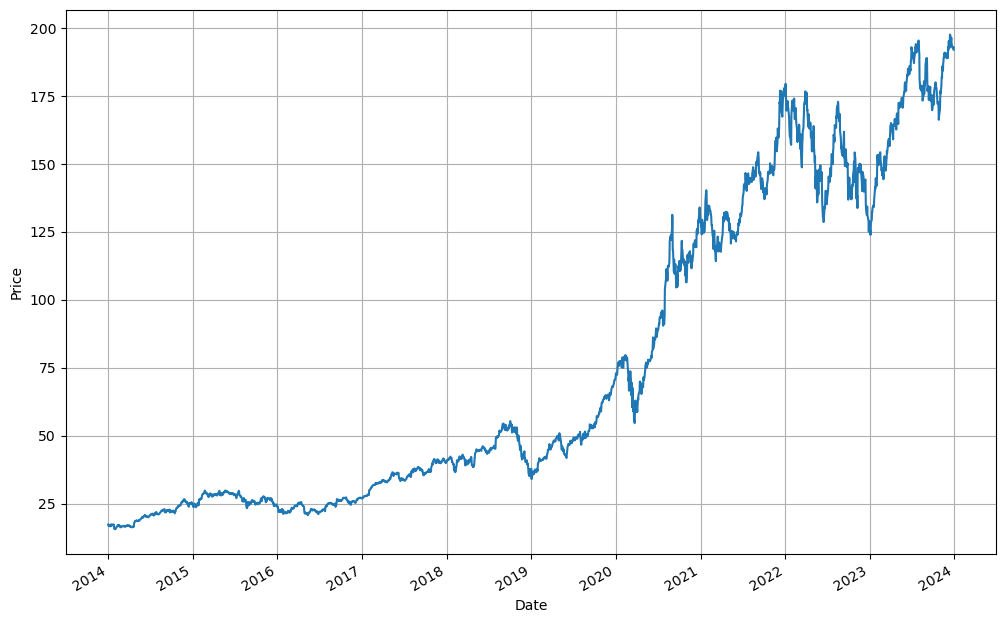

In [103]:
df_aapl['price'].plot( figsize=(12, 8))
plt.grid(True)
plt.ylabel('Price');

In [104]:
# 2. Check for missing values

df_aapl.isnull().sum()

Open      0
High      0
Low       0
Close     0
price     0
Volume    0
dtype: int64

In [105]:
# 3. Check data type of the columns

df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
 4   price   2516 non-null   float64
 5   Volume  2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [106]:
# 4. Subset Dataframe

df_aapl_price = df_aapl[['price']]

In [107]:
df_aapl_price.head()

,price
Date,
2014-01-02,17.273224
2014-01-03,16.893805
2014-01-06,16.985929
2014-01-07,16.864449
2014-01-08,16.971256


In [108]:
# 5. Get Summary statistics for the stock price

df_aapl_price.describe()

,price
count,2516.000000
mean,75.785417
std,56.582072
min,15.607208
25%,27.160179
50%,45.970673
75%,132.304100
max,197.589523


In [109]:
#6. Confirm data is a time series data suitalbe for various time series modelling approch

df_aapl_price.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [110]:
# 7.Account for weekends and holidays by setting the frequencey to business days and filling in values for weekends & holidays. 

start_date = df_aapl_price.index.min()
end_date = df_aapl_price.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='B')  # 'B' frequency for business days

# Reindex the dataframe to the new date range
df_aapl_price_daily = df_aapl_price.reindex(date_range)

# lastly, forward-fill missing values to handle weekends and holidays
df_aapl_price_daily.ffill(inplace=True)

print(df_aapl_price_daily.head())


                price
2014-01-02  17.273224
2014-01-03  16.893805
2014-01-06  16.985929
2014-01-07  16.864449
2014-01-08  16.971256


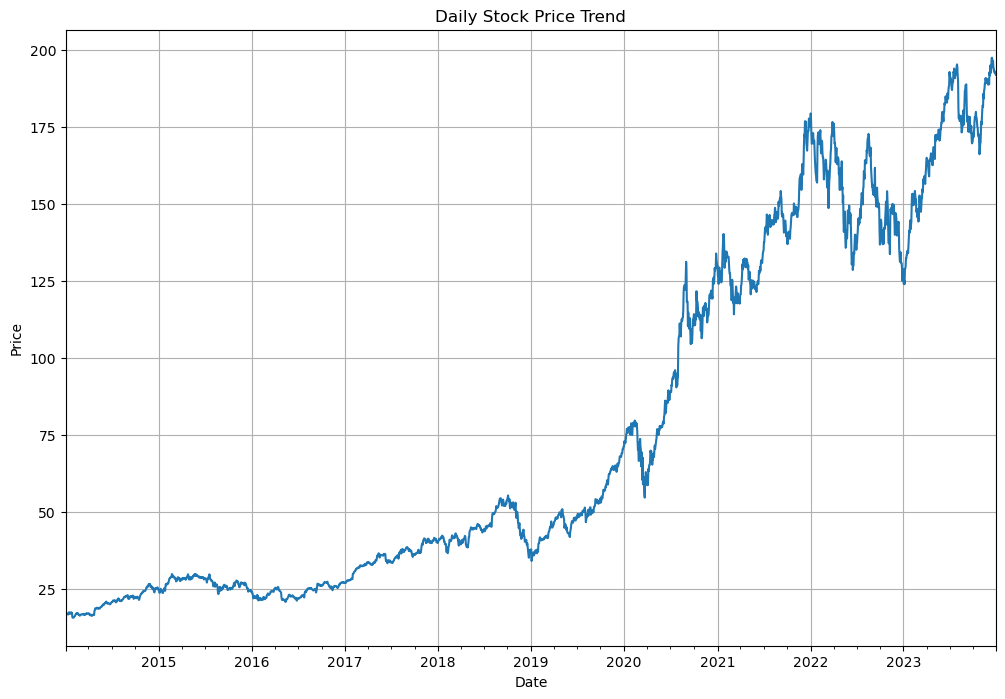

In [111]:
#. Plot price for the re-indexed data
import matplotlib.pyplot as plt

df_aapl_price_daily['price'].plot(title='Daily Stock Price Trend', figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show();

In [112]:
df_aapl_price_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2607 entries, 2014-01-02 to 2023-12-29
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2607 non-null   float64
dtypes: float64(1)
memory usage: 40.7 KB


# Split Dataset into training and test sets

In [113]:
# Determine the split index
split_index = int(len(df_aapl_price_daily) * 0.75)

# Split the data
train_data = df_aapl_price_daily[:split_index]
test_data = df_aapl_price_daily.iloc[split_index:]

# Print the sizes of the training and test sets
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 1955
Test set size: 652


In [114]:
test_data.describe()

,price
count,652.000000
mean,159.914230
std,17.486788
min,123.998459
25%,145.822430
50%,157.942818
75%,173.118259
max,197.589523


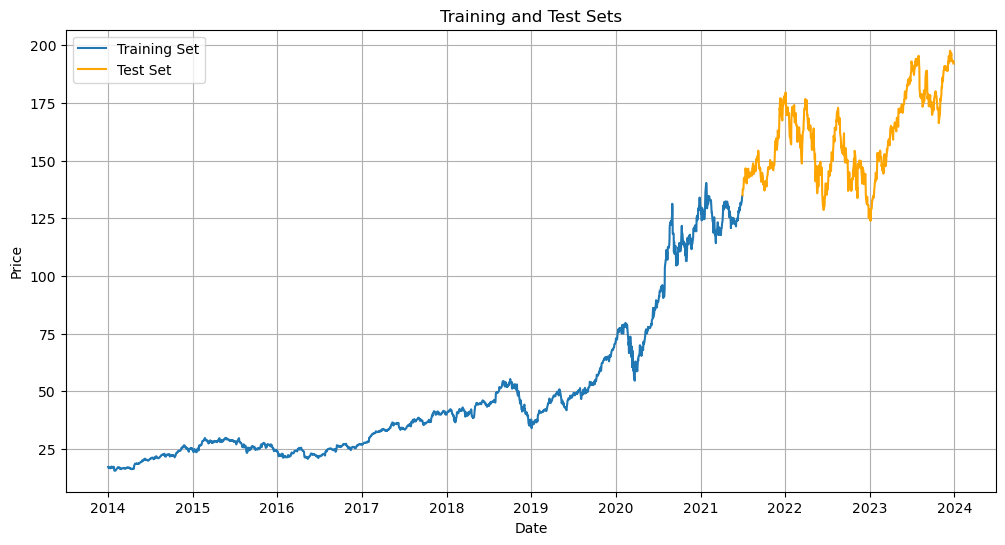

In [115]:
import matplotlib.pyplot as plt

# Plot the training and test sets
plt.figure(figsize=(12, 6))
plt.plot(train_data[['price']], label='Training Set')
plt.plot(test_data[['price']], label='Test Set', color='orange')
plt.title('Training and Test Sets')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Functions for Statistical Evaluation of Models Not available in pyhton libraries

In [116]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def directional_accuracy(y_true, y_pred):
    return np.mean((np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred)))[1:]) * 100



# Model 1 - Holt Winter Model

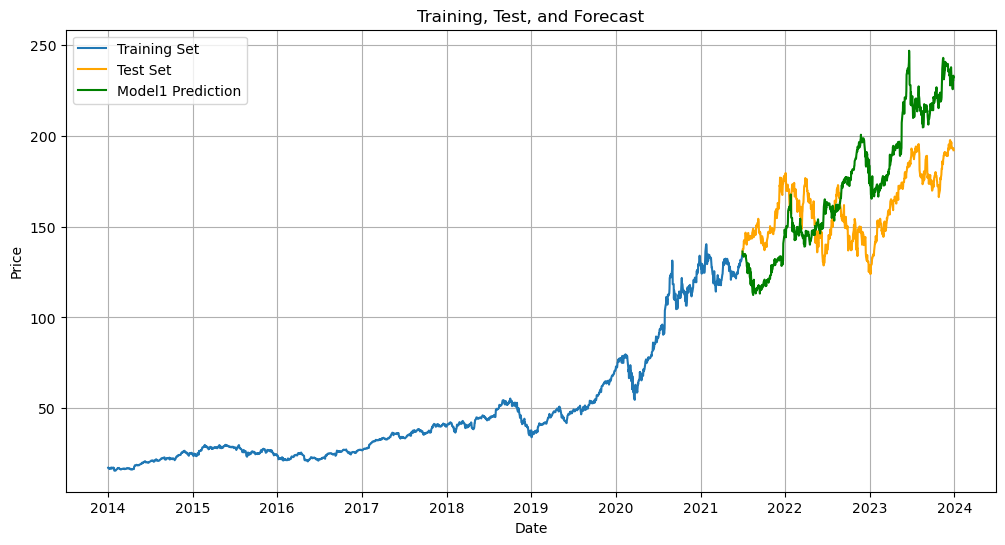


Forecasted values:
2021-07-01    136.250821
2021-07-02    134.568552
2021-07-05    134.015461
2021-07-06    133.369249
2021-07-07    134.846792
                 ...    
2023-12-25    225.595248
2023-12-26    231.432172
2023-12-27    230.234629
2023-12-28    233.040237
2023-12-29    232.144428
Freq: B, Length: 652, dtype: float64


In [117]:
#HoltWinters Model for price prediction. Justify why 'mul' as against 'add'

from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings("ignore")

# Fit the Exponential Smoothing model on the training set
fitted_model = ExponentialSmoothing(train_data['price'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=365).fit()

# Forecast on the test set
model1_predictions = fitted_model.forecast(len(test_data))

# Plot the forecasted values against the test set
plt.figure(figsize=(12, 6))
plt.plot(train_data['price'], label='Training Set')
plt.plot(test_data['price'], label='Test Set', color='orange')
plt.plot(model1_predictions, label='Model1 Prediction', color='green')
plt.title('Training, Test, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted price values
print("\nForecasted values:")
print(forecast)


## ## Statiscal Quantitative Evaluation of Model 1

In [127]:
#Evaluation of Holtwinters prediction. Since this is a regressional model, possible evaluation metrics to be used are i) Mean Absolute Error. 2) Mean Squared Error. 3.) Root Mean Square Error RMSE.RMSE will be used due to the advantage RMSE have over the other evaluation metrics.

from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

y_true = test_data['price'].values
y_pred = model1_predictions[-len(y_true):]


# Calculate mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)


# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Print the RMSE
print(f"RMSE (Model1 - Holt Winter): {rmse}")


# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Print the MAE
print(f"MAE (Model1 - Holt Winter): {mae}")



# Calculate mean absolute error percentage (MAPE)

mape_value = mape(y_true, y_pred)
print(f"MAPE: {mape_value:.2f}%")

# Directional Accuracy

directional_acc = directional_accuracy(y_true, y_pred)
print(f"Directional Accuracy: {directional_acc:.2f}%")

# Print the mean of test data prices
print(f"Mean of Test Data Prices: {test_data['price'].mean()}")

# Print the mean of predictions
print(f"Mean of model1 Predictions: {model1_predictions.mean()}")



RMSE (Model1 - Holt Winter): 31.50248958250686
MAE (Model1 - Holt Winter): 28.303819831764347
MAPE: 17.77%
Directional Accuracy: 48.00%
Mean of Test Data Prices: 159.9142299371263
Mean of model1 Predictions: 172.7274482286411


## Retrain the model on the entire historical price data and predict future prices with the final model

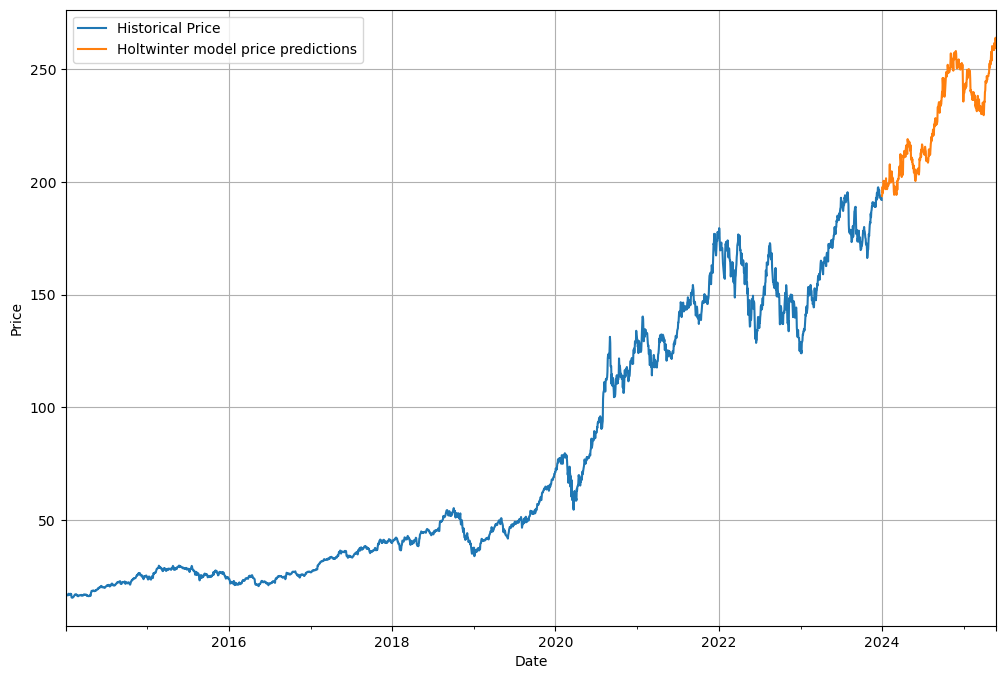

In [119]:
final_model = ExponentialSmoothing(df_aapl_price_daily['price'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=365).fit()

forecast_predictions = final_model.forecast(365)

df_aapl_price_daily['price'].plot(legend=True,label='Historical Price',figsize=(12,8))

forecast_predictions.plot(legend=True,label='Holtwinter model price predictions')

plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True);

## ARIMA Models



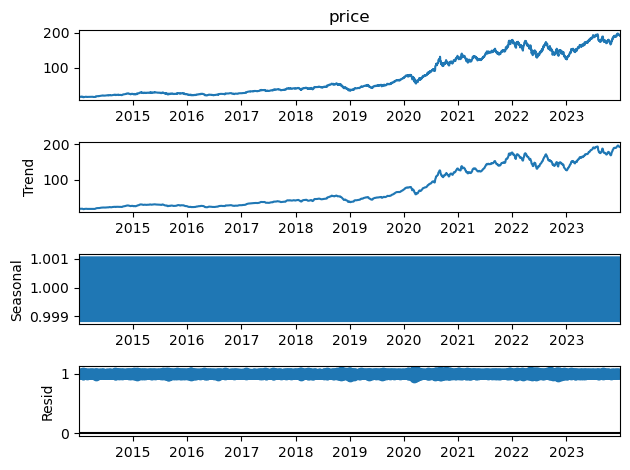

In [120]:
# Seasonal Decompose - To see the effect of trend and seasonality on the data and decide the type of Arima models to consider based on the dataset.

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_aapl_price_daily['price'], model='mul')
result.plot();

# The seasonal component ranges from 0.999 to 1.001, which indicates very small variations around the mean value of 1. These small fluctuations imply that the seasonal effects are negligible.

## Use Auto_Arima to perform grid search to determine the best form of ARIMA Model 

In [121]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima

# Determine the ARIMA Orders using pmdarima.auto_arima

auto_arima(df_aapl_price_daily['price'],seasonal=False).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2607
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -5035.470
Date:                Thu, 04 Jul 2024   AIC                          10078.941
Time:                        22:30:55   BIC                          10102.403
Sample:                    01-02-2014   HQIC                         10087.441
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0671      0.031      2.185      0.029       0.007       0.127
ma.L1         -0.0443      0.011     -4.023      0.000      -0.066      -0.023
ma.L2         -0.0270      0.012     -2.190      0.029      -0.051      -0.003
sigma2         2.7917      0.036     77.875      0.000       2.721       2.862
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6260.79
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              55.43   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Model 2 - SARIMAX of Order(0,1,2)

In [122]:

model2 = SARIMAX(train_data['price'], order=(0, 1, 2), seasonal_order=(0, 0, 0, 0), trend='c')

# Fit the model
results_model2 = model2.fit()

# Print the summary of the model
print(results_model2.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 1955
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -3066.110
Date:                Thu, 04 Jul 2024   AIC                           6140.221
Time:                        22:30:55   BIC                           6162.531
Sample:                    01-02-2014   HQIC                          6148.423
                         - 06-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0601      0.024      2.554      0.011       0.014       0.106
ma.L1         -0.1196      0.010    -11.404      0.000      -0.140      -0.099
ma.L2          0.0112      0.010      1.143      0.2

In [123]:
# Obtain predicted values

start=len(train_data)
end=len(train_data)+len(test_data)-1
model2_predictions = results_model2.predict(start=start, end=end,type='levels').rename('Model 2 SARIMAX Predictions')
print(model2_predictions)

2021-07-01    134.648511
2021-07-02    134.716835
2021-07-05    134.776904
2021-07-06    134.836973
2021-07-07    134.897042
                 ...    
2023-12-25    173.521529
2023-12-26    173.581599
2023-12-27    173.641668
2023-12-28    173.701737
2023-12-29    173.761806
Freq: B, Name: Model 2 SARIMAX Predictions, Length: 652, dtype: float64


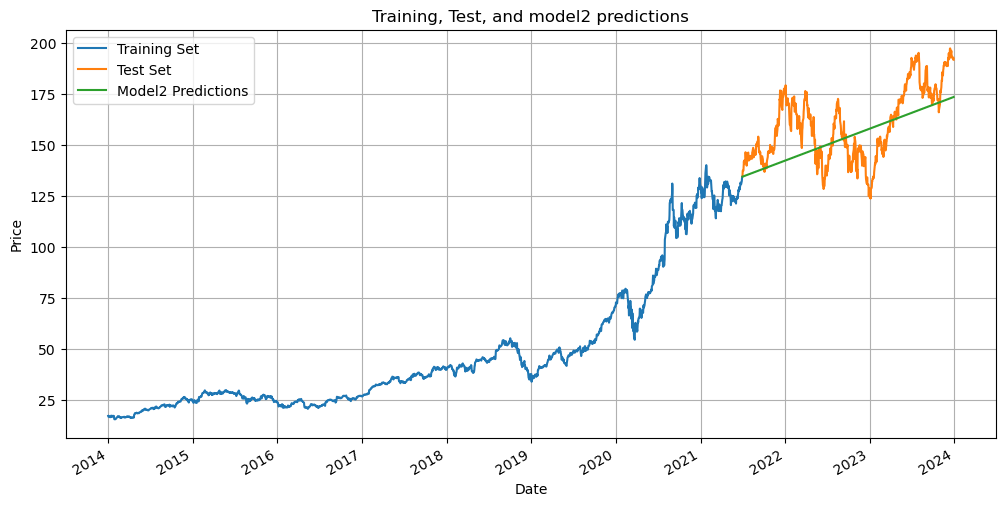

In [124]:
# Plot predictions against known price from historical data

plt.figure(figsize=(12, 6))
plt.plot(train_data['price'], label='Training Set')
plt.plot(test_data['price'], label='Test Set')

model2_predictions.plot(legend=True, label='Model2 Predictions')

plt.title('Training, Test, and model2 predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show();

## Statiscal Quantitative Evaluation of Model 2

In [126]:
from statsmodels.tools.eval_measures import rmse, meanabs

y_true = test_data['price'].values
y_pred = model2_predictions

# Calculate RMSE
errors_model2_sarimax = rmse(y_true, y_pred)

# Print the RMSE
print(f"RMSE (Model2): {errors_model2_sarimax}")

# Calculate MAE
mae_value = meanabs(y_true, y_pred)
print(f"MAE (Model2): {mae_value}")

# Calculate mean absolute error percentage (MAPE)
mape_value = mape(y_true, y_pred)
print(f"MAPE (Model2): {mape_value:.2f}%")

# Directional Accuracy
directional_acc = directional_accuracy(y_true, y_pred)
print(f"Directional Accuracy (Model2): {directional_acc:.2f}%")


# Print the mean of test data prices
print(f"Mean of Test Data: {test_data['price'].mean()}")

# Print the mean of predictions
print(f"Mean of model2 Predictions: {model2_predictions.mean()}")


RMSE (Model2): 15.634697005271583
MAE (Model2): 13.041036836304746
MAPE (Model2): 8.12%
Directional Accuracy (Model2): 50.46%
Mean of Test Data: 159.9142299371263
Mean of model2 Predictions: 154.20927322780713


#  Model 3 - SARIMAX of Order(0,1,2) & Seasonal order(1,1,1,252)

In [28]:
model3 = SARIMAX(train_data['price'], order=(0, 1, 2), seasonal_order=(1, 1, 1, 252))

# Fit a SARIMAX model
results_model3 = model3.fit()

# Print the summary of the model3
print(results_model3.summary())


                                       SARIMAX Results                                       
Dep. Variable:                                 price   No. Observations:                 1955
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 252)   Log Likelihood               -2906.400
Date:                               Thu, 04 Jul 2024   AIC                           5822.799
Time:                                       20:13:27   BIC                           5849.997
Sample:                                   01-02-2014   HQIC                          5832.867
                                        - 06-30-2021                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1284      0.012    -10.634      0.000      -0.152      -0.105
ma.L2      

In [29]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1

# Make predictions
model3_predictions = results_model3.predict(start=start_date, end=end_date, typ='levels').rename('Model3 SARIMAX PREDICTIONS')


print(model3_predictions)

2014-01-02      0.000000
2014-01-03     17.273221
2014-01-06     16.893804
2014-01-07     16.985929
2014-01-08     16.864449
                 ...    
2023-12-25    218.117059
2023-12-26    218.890372
2023-12-27    219.269520
2023-12-28    218.770065
2023-12-29    219.740258
Freq: B, Name: Model3 SARIMAX PREDICTIONS, Length: 2607, dtype: float64


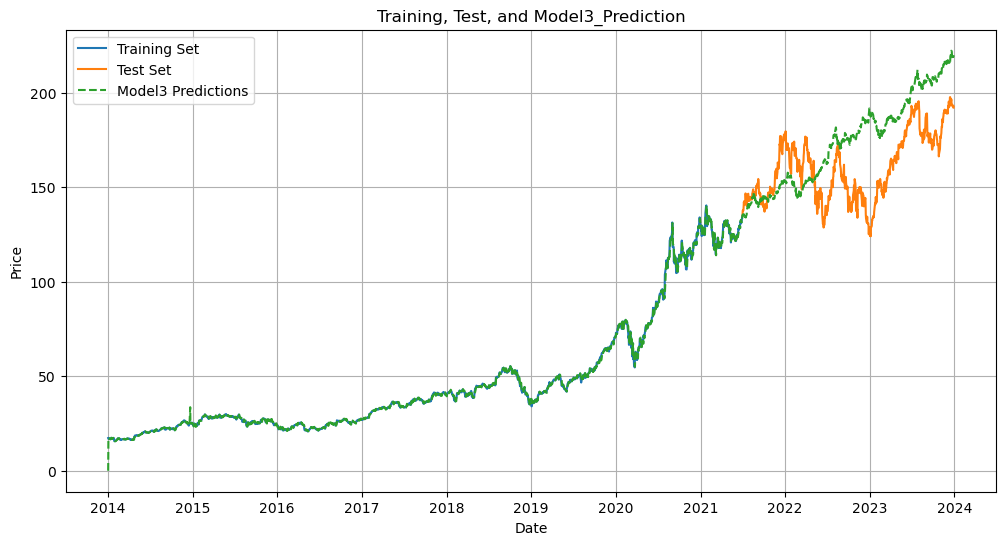

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['price'], label='Training Set')
plt.plot(test_data['price'], label='Test Set')
plt.plot(model3_predictions, label='Model3 Predictions', linestyle='--')

plt.title('Training, Test, and Model3_Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Statiscal Quantitative Evaluation of Model 3

In [131]:
from statsmodels.tools.eval_measures import rmse, meanabs

y_true = test_data['price'].values
y_pred = model3_predictions

# Calculate RMSE
errors_model2_sarimax = rmse(y_true, y_pred)

# Print the RMSE
print(f"RMSE (Model3_SARIMAX): {errors_model2_sarimax}")

# Calculate MAE
mae_value = meanabs(y_true, y_pred)
print(f"MAE (Model3_SARIMAX): {mae_value}")

# Calculate mean absolute error percentage (MAPE)
mape_value = mape(y_true, y_pred)
print(f"MAPE (Model3_SARIMAX): {mape_value:.2f}%")

# Directional Accuracy
directional_acc = directional_accuracy(y_true, y_pred)
print(f"Directional Accuracy (Model3_SARIMAX): {directional_acc:.2f}%")


# Print the mean of test data prices
print(f"Mean of Test Data Prices: {test_data['price'].mean()}")

# Print the mean of predictions
print(f"Mean of model3_Predictions: {model3_predictions.mean()}")


RMSE (Model3_SARIMAX): 24.692340934314192
MAE (Model3_SARIMAX): 20.90973741354183
MAPE (Model3_SARIMAX): 13.41%
Directional Accuracy (Model3_SARIMAX): 50.46%
Mean of Test Data Prices: 159.9142299371263
Mean of model3_Predictions: 174.25029874414236
